# ① 数据预处理 二元化

In [1]:
from sklearn.preprocessing import Binarizer


# 测试 Binarizer 的用法

In [2]:
def test_Binarizer():
    '''
    测试 Binarizer 的用法

    :return: None
    '''
    X=[   [1,2,3,4,5],
          [5,4,3,2,1],
          [3,3,3,3,3,],
          [1,1,1,1,1] ]
    print("before transform:",X)
    binarizer=Binarizer(threshold=2.5)
    print("after transform:",binarizer.transform(X))

# 调用 test_Binarizer

In [3]:
if __name__=='__main__':
    test_Binarizer() 

before transform: [[1, 2, 3, 4, 5], [5, 4, 3, 2, 1], [3, 3, 3, 3, 3], [1, 1, 1, 1, 1]]
after transform: [[0 0 1 1 1]
 [1 1 1 0 0]
 [1 1 1 1 1]
 [0 0 0 0 0]]


# ② 数据预处理 字典学习

In [4]:
from sklearn.decomposition import DictionaryLearning

# 测试 DictionaryLearning 的用法

In [5]:
def test_DictionaryLearning():
    '''
    测试 DictionaryLearning 的用法

    :return: None
    '''
    X=[[1,2,3,4,5],
       [6,7,8,9,10],
       [10,9,8,7,6,],
       [5,4,3,2,1] ]
    print("before transform:",X)
    dct=DictionaryLearning(n_components=3)
    dct.fit(X)
    print("components is :",dct.components_)
    print("after transform:",dct.transform(X))


# 调用 test_DictionaryLearning

In [6]:
if __name__=='__main__':
    test_DictionaryLearning() 

before transform: [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [10, 9, 8, 7, 6], [5, 4, 3, 2, 1]]
components is : [[ -4.47213595e-01  -4.47213595e-01  -4.47213595e-01  -4.47213595e-01
   -4.47213595e-01]
 [ -6.32455532e-01  -3.16227766e-01   2.41124693e-16   3.16227766e-01
    6.32455532e-01]
 [ -2.56238477e-01  -1.57949545e-01   1.93228062e-01  -8.87594974e-01
   -2.90227261e-01]]
after transform: [[ -6.70820393   0.           0.        ]
 [-17.88854382   0.           0.        ]
 [-17.88854382   0.           0.        ]
 [ -6.70820393   0.           0.        ]]


# ③ 数据预处理 包裹式特征选择

In [7]:
from sklearn.feature_selection import  RFE,RFECV
from sklearn.svm import LinearSVC
from sklearn.datasets import  load_iris
from  sklearn import  cross_validation

E:\Data_analysis_plan\python_36_install\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# 测试 RFE 的用法，其中目标特征数量为 2

In [8]:
def test_RFE():
    '''
    测试 RFE 的用法，其中目标特征数量为 2

    :return: None
    '''
    iris=load_iris()
    X=iris.data
    y=iris.target
    estimator=LinearSVC()
    selector=RFE(estimator=estimator,n_features_to_select=2)
    selector.fit(X,y)
    print("N_features %s"%selector.n_features_)
    print("Support is %s"%selector.support_)
    print("Ranking %s"%selector.ranking_)

# 测试 RFECV 的用法

In [9]:
def test_RFECV():
    '''
    测试 RFECV 的用法

    :return:  None
    '''
    iris=load_iris()
    X=iris.data
    y=iris.target
    estimator=LinearSVC()
    selector=RFECV(estimator=estimator,cv=3)
    selector.fit(X,y)
    print("N_features %s"%selector.n_features_)
    print("Support is %s"%selector.support_)
    print("Ranking %s"%selector.ranking_)
    print("Grid Scores %s"%selector.grid_scores_)

# 比较经过特征选择和未经特征选择的数据集，对 LinearSVC 的预测性能的区别

In [10]:
def test_compare_with_no_feature_selection():
    '''
    比较经过特征选择和未经特征选择的数据集，对 LinearSVC 的预测性能的区别

    :return: None
    '''
    ### 加载数据
    iris=load_iris()
    X,y=iris.data,iris.target
    ### 特征提取
    estimator=LinearSVC()
    selector=RFE(estimator=estimator,n_features_to_select=2)
    X_t=selector.fit_transform(X,y)
    #### 切分测试集与验证集
    X_train,X_test,y_train,y_test=cross_validation.train_test_split(X, y,
                test_size=0.25,random_state=0,stratify=y)
    X_train_t,X_test_t,y_train_t,y_test_t=cross_validation.train_test_split(X_t, y,
                test_size=0.25,random_state=0,stratify=y)
    ### 测试与验证
    clf=LinearSVC()
    clf_t=LinearSVC()
    clf.fit(X_train,y_train)
    clf_t.fit(X_train_t,y_train_t)
    print("Original DataSet: test score=%s"%(clf.score(X_test,y_test)))
    print("Selected DataSet: test score=%s"%(clf_t.score(X_test_t,y_test_t)))

# 调用 test_RFE

In [11]:
if __name__=='__main__':
    test_RFE() 

N_features 2
Support is [False  True False  True]
Ranking [3 1 2 1]


# 调用 test_compare_with_no_feature_selection

In [12]:
test_compare_with_no_feature_selection() 

Original DataSet: test score=0.973684210526
Selected DataSet: test score=0.947368421053


# 调用 test_RFECV

In [13]:
test_RFECV() 

N_features 4
Support is [ True  True  True  True]
Ranking [1 1 1 1]
Grid Scores [ 0.91421569  0.94689542  0.95383987  0.96691176]


# ④ 数据预处理 嵌入式特征选择

In [14]:
from sklearn.feature_selection import  SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.datasets import  load_digits,load_diabetes
import numpy as np
import  matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

# 测试 SelectFromModel 的用法

In [15]:
def test_SelectFromModel():
    '''
    测试 SelectFromModel 的用法。

    :return: None
    '''
    digits=load_digits()
    X=digits.data
    y=digits.target
    estimator=LinearSVC(penalty='l1',dual=False)
    selector=SelectFromModel(estimator=estimator,threshold='mean')
    selector.fit(X,y)
    selector.transform(X)
    print("Threshold %s"%selector.threshold_)
    print("Support is %s"%selector.get_support(indices=True))

# 测试 alpha 与稀疏性的关系

In [23]:
def test_Lasso(*data):
    '''
    测试 alpha 与稀疏性的关系

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的值、测试样本的值
    :return: None
    '''
    X,y=data
    alphas=np.logspace(-2,2)
    zeros=[]
    for alpha in alphas:
        regr=Lasso(alpha=alpha)
        regr.fit(X,y)
        ### 计算零的个数 ###
        num=0
        for ele in regr.coef_:
            if abs(ele) < 1e-5:num+=1
        zeros.append(num)
    ##### 绘图
    fig=plt.figure(figsize=(10,8),dpi=80)
    ax=fig.add_subplot(1,1,1)
    ax.plot(alphas,zeros)
    ax.set_xlabel(r"$\alpha$")
    ax.set_xscale("log")
    ax.set_ylim(0,X.shape[1]+1)
    ax.set_ylabel("zeros in coef")
    ax.set_title("Sparsity In Lasso")
    plt.show()

# 测试 C  与 稀疏性的关系

In [24]:
def test_LinearSVC(*data):
    '''
    测试 C  与 稀疏性的关系

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的标记、测试样本的标记
    :return: None
    '''
    X,y=data
    Cs=np.logspace(-2,2)
    zeros=[]
    for C in Cs:
        clf=LinearSVC(C=C,penalty='l1',dual=False)
        clf.fit(X,y)
         ### 计算零的个数 ###
        num=0
        for row in clf.coef_:
            for ele in row:
                if abs(ele) < 1e-5:num+=1
        zeros.append(num)
    ##### 绘图
    fig=plt.figure(figsize=(10,8),dpi=80)
    ax=fig.add_subplot(1,1,1)
    ax.plot(Cs,zeros)
    ax.set_xlabel("C")
    ax.set_xscale("log")
    ax.set_ylabel("zeros in coef")
    ax.set_title("Sparsity In SVM")
    plt.show()

# 调用 test_SelectFromModel

In [18]:
if __name__=='__main__':
    test_SelectFromModel() 

Threshold 0.703504042989
Support is [ 2  3  4  5  6  9 12 13 14 16 18 19 20 21 22 24 27 30 33 36 38 41 42 43 44
 45 53 54 55 58 61]


# 生成用于回归问题的数据集

In [19]:
data=load_diabetes() 

# 调用 test_Lasso

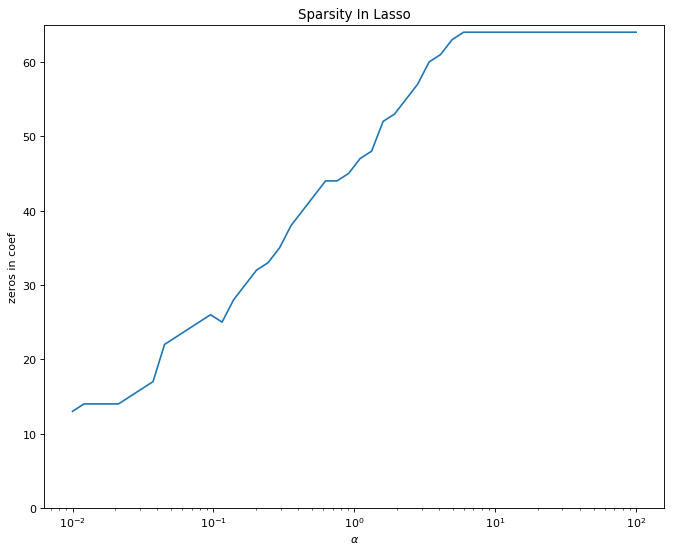

In [25]:
test_Lasso(data.data,data.target) 

# 生成用于分类问题的数据集

In [26]:
data=load_digits() 

# 调用 test_LinearSVC

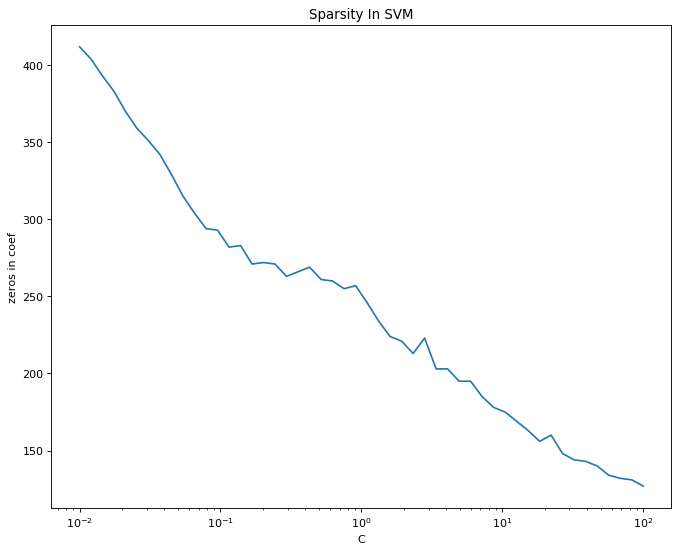

In [27]:
test_LinearSVC(data.data,data.target) 

# ⑤ 数据预处理 过滤式特征选择

In [28]:
from sklearn.feature_selection import  VarianceThreshold,SelectKBest,f_classif

# 测试 VarianceThreshold  的用法

In [29]:
def test_VarianceThreshold():
    '''
    测试 VarianceThreshold  的用法

    :return:  None
    '''
    X=[[100,1,2,3],
       [100,4,5,6],
       [100,7,8,9],
       [101,11,12,13]]
    selector=VarianceThreshold(1)
    selector.fit(X)
    print("Variances is %s"%selector.variances_)
    print("After transform is %s"%selector.transform(X))
    print("The surport is %s"%selector.get_support(True))
    print("After reverse transform is %s"%
            selector.inverse_transform(selector.transform(X)))

# 测试 SelectKBest  的用法，其中考察的特征指标是 f_classif

In [30]:
def test_SelectKBest():
    '''
    测试 SelectKBest  的用法，其中考察的特征指标是 f_classif

    :return:  None
    '''
    X=[   [1,2,3,4,5],
          [5,4,3,2,1],
          [3,3,3,3,3,],
          [1,1,1,1,1] ]
    y=[0,1,0,1]
    print("before transform:",X)
    selector=SelectKBest(score_func=f_classif,k=3)
    selector.fit(X,y)
    print("scores_:",selector.scores_)
    print("pvalues_:",selector.pvalues_)
    print("selected index:",selector.get_support(True))
    print("after transform:",selector.transform(X))

In [31]:
# 调用 test_VarianceThreshold

In [32]:
if __name__=='__main__':
    test_VarianceThreshold() 

Variances is [  0.1875  13.6875  13.6875  13.6875]
After transform is [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [11 12 13]]
The surport is [1 2 3]
After reverse transform is [[ 0  1  2  3]
 [ 0  4  5  6]
 [ 0  7  8  9]
 [ 0 11 12 13]]


# 调用 test_SelectKBest

In [34]:
test_SelectKBest() 

before transform: [[1, 2, 3, 4, 5], [5, 4, 3, 2, 1], [3, 3, 3, 3, 3], [1, 1, 1, 1, 1]]
scores_: [ 0.2  0.   1.   8.   9. ]
pvalues_: [ 0.69848865  1.          0.42264974  0.10557281  0.09546597]
selected index: [2 3 4]
after transform: [[3 4 5]
 [3 2 1]
 [3 3 3]
 [1 1 1]]


# ⑥ 数据预处理 数据正则化

In [35]:
from sklearn.preprocessing import Normalizer

# 测试 Normalizer 的用法

In [36]:
def test_Normalizer():
    '''
    测试 Normalizer 的用法

    :return: None
    '''
    X=[   [1,2,3,4,5],
          [5,4,3,2,1],
          [1,3,5,2,4,],
          [2,4,1,3,5] ]
    print("before transform:",X)
    normalizer=Normalizer(norm='l2')
    print("after transform:",normalizer.transform(X))

# 调用 test_Normalizer

In [37]:
if __name__=='__main__':
    test_Normalizer() 

before transform: [[1, 2, 3, 4, 5], [5, 4, 3, 2, 1], [1, 3, 5, 2, 4], [2, 4, 1, 3, 5]]
after transform: [[ 0.13483997  0.26967994  0.40451992  0.53935989  0.67419986]
 [ 0.67419986  0.53935989  0.40451992  0.26967994  0.13483997]
 [ 0.13483997  0.40451992  0.67419986  0.26967994  0.53935989]
 [ 0.26967994  0.53935989  0.13483997  0.40451992  0.67419986]]


# ⑦ 数据预处理 独热码编码

# 测试 OneHotEncoder 的用法

In [39]:
from sklearn.preprocessing import OneHotEncoder

In [40]:
def test_OneHotEncoder():
    '''
    测试 OneHotEncoder 的用法

    :return: None
    '''
    X=[   [1,2,3,4,5],
          [5,4,3,2,1],
          [3,3,3,3,3,],
          [1,1,1,1,1] ]
    print("before transform:",X)
    encoder=OneHotEncoder(sparse=False)
    encoder.fit(X)
    print("active_features_:",encoder.active_features_)
    print("feature_indices_:",encoder.feature_indices_)
    print("n_values_:",encoder.n_values_)
    print("after transform:",encoder.transform( [[1,2,3,4,5]]))

# 调用 test_OneHotEncoder

In [41]:
if __name__=='__main__':
    test_OneHotEncoder() 

before transform: [[1, 2, 3, 4, 5], [5, 4, 3, 2, 1], [3, 3, 3, 3, 3], [1, 1, 1, 1, 1]]
active_features_: [ 1  3  5  7  8  9 10 12 14 16 17 18 19 21 23 25]
feature_indices_: [ 0  6 11 15 20 26]
n_values_: [6 5 4 5 6]
after transform: [[ 1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  1.]]


# ⑧ 数据预处理 流水线

In [56]:
from sklearn.svm import  LinearSVC
from sklearn.datasets import  load_digits
from sklearn import  cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# 测试 Pipeline 的用法

In [59]:
def test_Pipeline(data):
    '''
    测试 Pipeline 的用法

    :param data:  一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的标记、测试样本的标记
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    steps=[("Linear_SVM",LinearSVC(C=1,penalty='l1',dual=False)),
           ("LogisticRegression",LogisticRegression(C=1))]
    pipeline=Pipeline(steps)
    pipeline.fit(X_train,y_train)
    print("Named steps:",pipeline.named_steps)
    print("Pipeline Score:",pipeline.score(X_test,y_test))

# 生成用于分类问题的数据集

In [60]:
if __name__=='__main__':
    data=load_digits() 
    #%%
    X=data.data
    #%%
    y=data.target
    #%%
    Data=cross_validation.train_test_split(X, y,test_size=0.25,random_state=0,stratify=y) 

# 调用 test_Pipeline运行错误

In [ ]:
test_Pipeline(Data)

# ⑨ 数据预处理 数据标准化

# 测试 MinMaxScaler 的用法

In [49]:
from sklearn.preprocessing import MinMaxScaler,MaxAbsScaler,StandardScaler

# 测试 MinMaxScaler 的用法

In [50]:
def test_MinMaxScaler():
    '''
    测试 MinMaxScaler 的用法

    :return: None
    '''
    X=[   [1,5,1,2,10],
      [2,6,3,2,7],
      [3,7,5,6,4,],
      [4,8,7,8,1] ]
    print("before transform:",X)
    scaler=MinMaxScaler(feature_range=(0,2))
    scaler.fit(X)
    print("min_ is :",scaler.min_)
    print("scale_ is :",scaler.scale_)
    print("data_max_ is :",scaler.data_max_)
    print("data_min_ is :",scaler.data_min_)
    print("data_range_ is :",scaler.data_range_)
    print("after transform:",scaler.transform(X))

# 测试 MaxAbsScaler 的用法

In [51]:
def test_MaxAbsScaler():
    '''
    测试 MaxAbsScaler 的用法

    :return: None
    '''
    X=[   [1,5,1,2,10],
      [2,6,3,2,7],
      [3,7,5,6,4,],
      [4,8,7,8,1] ]
    print("before transform:",X)
    scaler=MaxAbsScaler()
    scaler.fit(X)
    print("scale_ is :",scaler.scale_)
    print("max_abs_ is :",scaler.max_abs_)
    print("after transform:",scaler.transform(X))

# 测试 StandardScaler 的用法

In [52]:
def test_StandardScaler():
    '''
    测试 StandardScaler 的用法

    :return: None
    '''
    X=[   [1,5,1,2,10],
      [2,6,3,2,7],
      [3,7,5,6,4,],
      [4,8,7,8,1] ]
    print("before transform:",X)
    scaler=StandardScaler()
    scaler.fit(X)
    print("scale_ is :",scaler.scale_)
    print("mean_ is :",scaler.mean_)
    print("var_ is :",scaler.var_)
    print("after transform:",scaler.transform(X))

# 调用 test_MinMaxScaler

In [53]:
if __name__=='__main__':
    test_MinMaxScaler()  

before transform: [[1, 5, 1, 2, 10], [2, 6, 3, 2, 7], [3, 7, 5, 6, 4], [4, 8, 7, 8, 1]]
min_ is : [-0.66666667 -3.33333333 -0.33333333 -0.66666667 -0.22222222]
scale_ is : [ 0.66666667  0.66666667  0.33333333  0.33333333  0.22222222]
data_max_ is : [  4.   8.   7.   8.  10.]
data_min_ is : [ 1.  5.  1.  2.  1.]
data_range_ is : [ 3.  3.  6.  6.  9.]
after transform: [[ 0.          0.          0.          0.          2.        ]
 [ 0.66666667  0.66666667  0.66666667  0.          1.33333333]
 [ 1.33333333  1.33333333  1.33333333  1.33333333  0.66666667]
 [ 2.          2.          2.          2.          0.        ]]


# 调用 test_MaxAbsScaler 

In [54]:
test_MaxAbsScaler()    

before transform: [[1, 5, 1, 2, 10], [2, 6, 3, 2, 7], [3, 7, 5, 6, 4], [4, 8, 7, 8, 1]]
scale_ is : [  4.   8.   7.   8.  10.]
max_abs_ is : [  4.   8.   7.   8.  10.]
after transform: [[ 0.25        0.625       0.14285714  0.25        1.        ]
 [ 0.5         0.75        0.42857143  0.25        0.7       ]
 [ 0.75        0.875       0.71428571  0.75        0.4       ]
 [ 1.          1.          1.          1.          0.1       ]]


# 调用 test_MaxAbsScaler

In [55]:
test_MaxAbsScaler()  

before transform: [[1, 5, 1, 2, 10], [2, 6, 3, 2, 7], [3, 7, 5, 6, 4], [4, 8, 7, 8, 1]]
scale_ is : [  4.   8.   7.   8.  10.]
max_abs_ is : [  4.   8.   7.   8.  10.]
after transform: [[ 0.25        0.625       0.14285714  0.25        1.        ]
 [ 0.5         0.75        0.42857143  0.25        0.7       ]
 [ 0.75        0.875       0.71428571  0.75        0.4       ]
 [ 1.          1.          1.          1.          0.1       ]]
